럭키백<br>
KNN최근접이웃<br>
K-최근접 이웃은 주변이웃을 찾아주니까 이웃의 클래스 비율을 확룰로 출력

In [1]:
#데이터 호출 및 확인
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
print(fish.head(2))

print("\n")
#타겟값 중복값 제거하여 확인
print(pd.unique(fish["Species"]))



  Species  Weight  Length  Diagonal  Height   Width
0   Bream   242.0    25.4      30.0   11.52  4.0200
1   Bream   290.0    26.3      31.2   12.48  4.3056


['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [5]:
# 트레이닝, 테스트 데이터 전처리
# 평균과 표준편차를 직접 구해 특성을 표준점수로 바꾸어주는 데이터 스케일링 작업 → StandardScaler
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

array([[-4.38072172e-01, -2.82303007e-01, -1.06020232e-01,
         5.96578670e-01, -2.36528948e-01],
       [-3.03562184e-01, -1.98053663e-01, -2.33668373e-03,
         8.21260549e-01, -6.65789457e-02],
       [-1.63447613e-01, -1.79331587e-01, -1.09769794e-02,
         7.97341291e-01,  1.65793169e-01],
       [-9.89949100e-02,  5.46943678e-02,  1.96390116e-01,
         8.79771455e-01,  2.26210031e-02],
       [ 8.87586153e-02,  5.46943678e-02,  2.39591594e-01,
         8.12834979e-01,  4.26371272e-01],
       [ 1.44804444e-01,  1.20221635e-01,  3.00073664e-01,
         1.08395111e+00,  3.03431249e-01],
       [ 2.84919015e-01,  1.20221635e-01,  2.82793073e-01,
         1.21901769e+00,  5.12357880e-01],
       [-2.33330416e-02,  1.48304750e-01,  3.25994551e-01,
         8.65728838e-01,  1.62163285e-01],
       [ 1.44804444e-01,  1.48304750e-01,  3.34634847e-01,
         1.17815367e+00,  2.53683979e-01],
       [ 2.84919015e-01,  2.13832017e-01,  4.29678099e-01,
         1.23004114e+00

판다스로 데이터 호출 및 배열변환<br>
Species 종류별로 확률구하기

In [6]:
#전처리 : 인풋과 타겟 데이터 분리 후 배열로 저장
fish_input = ss.fit_transform(fish[["Weight", "Length", "Diagonal", "Height", "Width"]]) 
print(fish_input[:2])

fish_target = fish["Species"].to_numpy()
print(fish_target[:2])

[[-0.43807217 -0.28230301 -0.10602023  0.59657867 -0.23652895]
 [-0.30356218 -0.19805366 -0.00233668  0.82126055 -0.06657895]]
['Bream' 'Bream']


In [9]:
#트레이닝, 테스트 세트 분리
from sklearn.model_selection import train_test_split

train_scaled, test_scaled, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

K최근접 이웃의 다중분류

In [11]:
#k-최근접 이웃분류기 확률예측
#k-최근접 이웃 알고리즘 생성 및 학습
from sklearn.neighbors import KNeighborsClassifier
#모델생성
kn = KNeighborsClassifier(n_neighbors=3) #이웃개수 3개
#모델학습
kn.fit(train_scaled, train_target)
print(f"트레이닝 데이터 학습 점수 : {kn.score(train_scaled,train_target)}")
print(f"테스트 데이터 학습 점수 : {kn.score(test_scaled,test_target)}")

트레이닝 데이터 학습 점수 : 0.8907563025210085
테스트 데이터 학습 점수 : 0.85


In [12]:
#클래스 즉 타겟확인
print(pd.unique(fish["Species"]))
#사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 정렬됨
print(kn.classes_)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [13]:
#5개 데이터 예측진행
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

위 5개 데이터 예측은 어떤 확률로 생성되었을까?<br>
사이킷런의 분류모델은 predict_proba() 메서드로 클래스 분류 확률값 반환함<br>
확률 출력을 위해 predict_proba 메서드 사용

In [8]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) #확률 출력을 위해 predict_proba 메서드 사용
print(kn.classes_)  #속성값 확인
print("\n")
print(np.round(proba, decimals=2)) #소수점 자리수 조정을 위해 decimals 조정, 해당코드에서는 소수점 3자리부터 반올림함

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


[[0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.67 0.   0.33 0.   0.  ]
 [0.   0.   0.67 0.   0.33 0.   0.  ]]


회귀식의 결과값을 0~1사이의 확률값으로 반환하기위해 시그모이드 함수사용

In [14]:
#네번째샘플에 대한 이웃 인덱스를 활용한 시각화 ★★★

distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

#3분의 2확률로 perch 

[['Roach' 'Perch' 'Perch']]


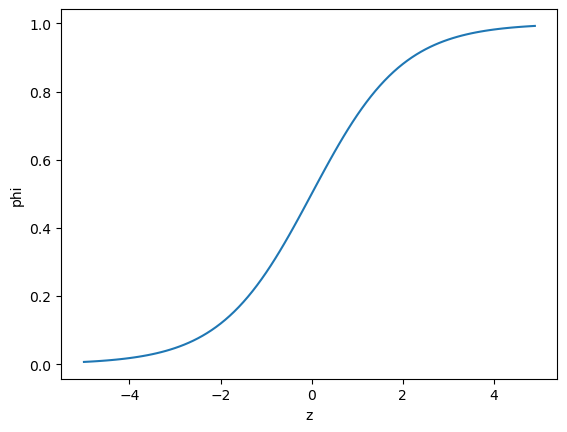

In [10]:
#시그모이드 함수시각화

import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel("z")
plt.ylabel("phi")
plt.show()

로지스틱회귀 : z = [a*(weight) + b*(length) + c*(Diagonal) + d*(height)+ e*(weight)] + f <br>
로지스틱회귀 값 z를 확률로 변환해주는데 필요한 함수가 시그모이드함수와 소프트맥스가 있음<br>
-시그모이드함수(로지스틱함수) : 이진분류를 목표로할때 사용하며, 선형방정식의 출력을 0과 1사이의 값으로 압축함(0~100%)<br>
-소프트맥스 : 다중분류를 목표로할때 사용하며, 여러 선형 방정식의 출력결과를 정규화하여 합이 1이되도록 만듬(0~100%)

In [16]:
#이진분류를 위한 데이터 분리
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

print(lr.classes_)
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99745183 0.00254817]
 [0.02849717 0.97150283]
 [0.99459324 0.00540676]
 [0.98511478 0.01488522]
 [0.99753497 0.00246503]]


In [30]:
print(f"회귀계수:{lr.coef_}, 절편:{lr.intercept_}")

#z값 구하기
decisions = lr.decision_function(train_bream_smelt[:5])
print(f"z값 : {decisions}")

회귀계수:[[-0.41981254 -0.60056128 -0.68786241 -1.00159093 -0.74532495]], 절편:[-2.1898649]
z값 : [-5.96982853  3.52903927 -5.21468393 -4.19238958 -6.00308165]


In [32]:
#이진분류에서의 확률변환 : 시그모이드함수
from scipy.special import expit
print(f"z값 : {decisions}")
print(f"z값에 시그모이드함수 적용 : {expit(decisions)}")

z값 : [-5.96982853  3.52903927 -5.21468393 -4.19238958 -6.00308165]
z값에 시그모이드함수 적용 : [0.00254817 0.97150283 0.00540676 0.01488522 0.00246503]


In [52]:
#다중분류에서의 확률변환 : 소프트맥스
lr = LogisticRegression(C=20, max_iter=1000) #C규제값 20, 1000번 반복
lr.fit(train_scaled, train_target)
print(f"학습데이터 점수 : {lr.score(train_scaled, train_target)}")
print(f"학습데이터 점수 : {lr.score(test_scaled, test_target)}")

print(lr.predict(test_scaled[:5]))
print(np.round(lr.predict_proba(test_scaled[:5]),decimals=2))

import numpy as np

from scipy.special import softmax
#z값 구하기
decision = lr.decision_function(test_scaled[:5])
print(f"z값 : {np.round(decision,decimals=2)}")
proba = softmax(decision, axis = 1)
print(f"z값 소프트맥스함수 적용\n{np.round(proba,decimals=2)}")

학습데이터 점수 : 0.9243697478991597
학습데이터 점수 : 0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.   0.01 0.84 0.   0.14 0.01 0.  ]
 [0.   0.   0.05 0.   0.01 0.94 0.  ]
 [0.   0.   0.03 0.93 0.02 0.01 0.  ]
 [0.01 0.03 0.32 0.01 0.55 0.   0.07]
 [0.   0.   0.9  0.   0.09 0.   0.  ]]
z값 : [[ -6.28   1.05   5.11  -2.82   3.29   0.32  -0.65]
 [-10.51   1.95   4.7   -2.58   2.92   7.74  -4.22]
 [ -4.03  -6.14   3.08   6.37   2.34   2.17  -3.78]
 [ -0.61   0.42   2.64  -1.18   3.2   -5.68   1.2 ]
 [ -6.13  -1.92   5.72  -0.23   3.47  -0.22  -0.68]]
z값 소프트맥스함수 적용
[[0.   0.01 0.84 0.   0.14 0.01 0.  ]
 [0.   0.   0.05 0.   0.01 0.94 0.  ]
 [0.   0.   0.03 0.93 0.02 0.01 0.  ]
 [0.01 0.03 0.32 0.01 0.55 0.   0.07]
 [0.   0.   0.9  0.   0.09 0.   0.  ]]
